In [9]:
import pandas as pd
import os
from time import time
from time import sleep

In [14]:
def auto_update():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'10',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'ef20b8fe-0d90-4bc8-a047-e4d8895dc4ae',
    }
    session = Session()
    session.headers.update(headers)
    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df2.append(df2)
    
    if not os.path.isfile(r"/storage/emulated/0/Documents/Pydroid3/csv files/CoinMarketUpdate.csv"):
        df.to_csv(r"/storage/emulated/0/Documents/Pydroid3/csv files/CoinMarketUpdate.csv", header = "column_names")
    else:
        df.to_csv(r"/storage/emulated/0/Documents/Pydroid3/csv files/CoinMarketUpdate.csv", mode='a')

In [99]:
auto_update()

{'status': {'timestamp': '2023-08-01T03:29:14.697Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 9867}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10379, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [29]:
pd.set_option("display.float_format" , lambda x: '%.5f' % x)

In [26]:
pd.set_option("display.max_columns", None)

In [31]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [32]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.39501,-0.84001,0.42528,-4.43969,8.81100,2.87284
Ethereum,-0.57864,-1.04465,0.13834,-3.50188,-0.96543,-0.28949
Tether USDt,0.00578,-0.03144,-0.02136,-0.01924,-0.04343,-0.05468
BNB,-0.46005,-1.09857,0.76483,-2.00318,-21.12543,-25.58370
XRP,-0.16195,-2.04750,-0.78473,46.60165,35.37653,50.29102
USD Coin,0.01604,-0.01258,-0.01256,0.00115,-0.00913,0.00726
Dogecoin,-1.07316,-1.73324,2.46056,14.77769,7.75190,-1.45686
Cardano,-1.08028,-3.49668,-0.03239,5.13715,-16.96962,-21.20613
Solana,-1.62276,-3.76937,0.91889,26.51645,14.16737,7.69910


In [33]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.39501
             quote.USD.percent_change_24h    -0.84001
             quote.USD.percent_change_7d      0.42528
             quote.USD.percent_change_30d    -4.43969
             quote.USD.percent_change_60d     8.81100
             quote.USD.percent_change_90d     2.87284
Ethereum     quote.USD.percent_change_1h     -0.57864
             quote.USD.percent_change_24h    -1.04465
             quote.USD.percent_change_7d      0.13834
             quote.USD.percent_change_30d    -3.50188
             quote.USD.percent_change_60d    -0.96543
             quote.USD.percent_change_90d    -0.28949
Tether USDt  quote.USD.percent_change_1h      0.00578
             quote.USD.percent_change_24h    -0.03144
             quote.USD.percent_change_7d     -0.02136
             quote.USD.percent_change_30d    -0.01924
             quote.USD.percent_change_60d    -0.04343
             quote.USD.percent_change_90

In [41]:
type(df5)

pandas.core.frame.DataFrame

In [40]:
df5 = df4.to_frame(name='values')

In [42]:
df5.count()

values    60
dtype: int64

In [43]:
index = pd.Index(range(60))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.39501
1,Bitcoin,quote.USD.percent_change_24h,-0.84001
2,Bitcoin,quote.USD.percent_change_7d,0.42528
3,Bitcoin,quote.USD.percent_change_30d,-4.43969
4,Bitcoin,quote.USD.percent_change_60d,8.81100
5,Bitcoin,quote.USD.percent_change_90d,2.87284
6,Ethereum,quote.USD.percent_change_1h,-0.57864
7,Ethereum,quote.USD.percent_change_24h,-1.04465
8,Ethereum,quote.USD.percent_change_7d,0.13834
9,Ethereum,quote.USD.percent_change_30d,-3.50188


In [47]:
df7= df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.39501
1,Bitcoin,quote.USD.percent_change_24h,-0.84001
2,Bitcoin,quote.USD.percent_change_7d,0.42528
3,Bitcoin,quote.USD.percent_change_30d,-4.43969
4,Bitcoin,quote.USD.percent_change_60d,8.81100
5,Bitcoin,quote.USD.percent_change_90d,2.87284
6,Ethereum,quote.USD.percent_change_1h,-0.57864
7,Ethereum,quote.USD.percent_change_24h,-1.04465
8,Ethereum,quote.USD.percent_change_7d,0.13834
9,Ethereum,quote.USD.percent_change_30d,-3.50188


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
%matplotlib inline

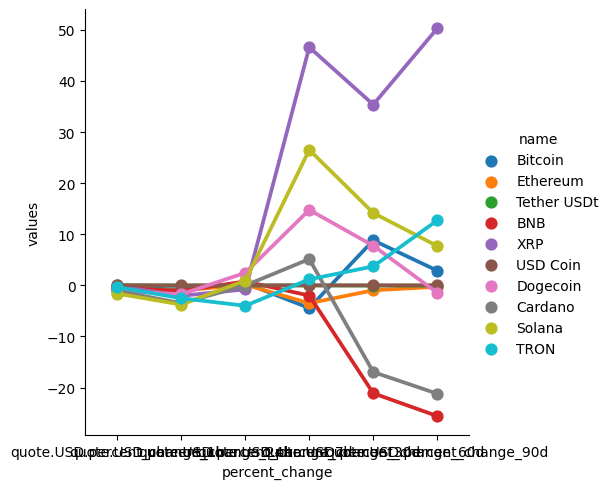

In [68]:

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')


In [62]:
df7.dtypes

name               object
percent_change     object
values            float64
dtype: object

In [82]:
df7['percent_change'] = df7['percent_change'].replace(to_replace=['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'] , value= ['1h','24','7d','30d','60d','90d'])

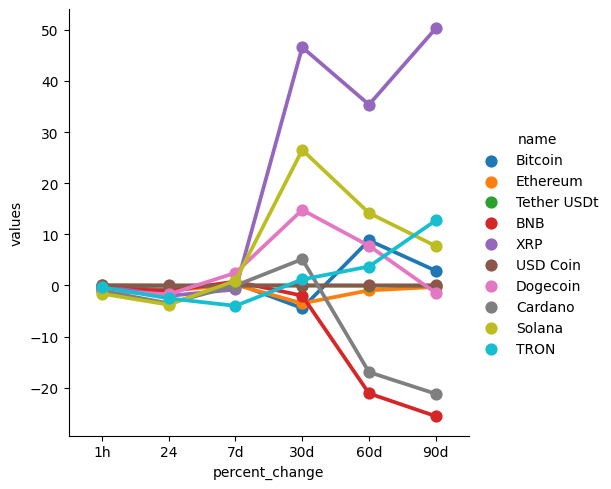

In [83]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [100]:
df8 = df[['name','quote.USD.price','timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,28895.17280,2023-08-01 03:29:14.021482
0,Bitcoin,28895.17280,2023-08-01 03:29:14.021482


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

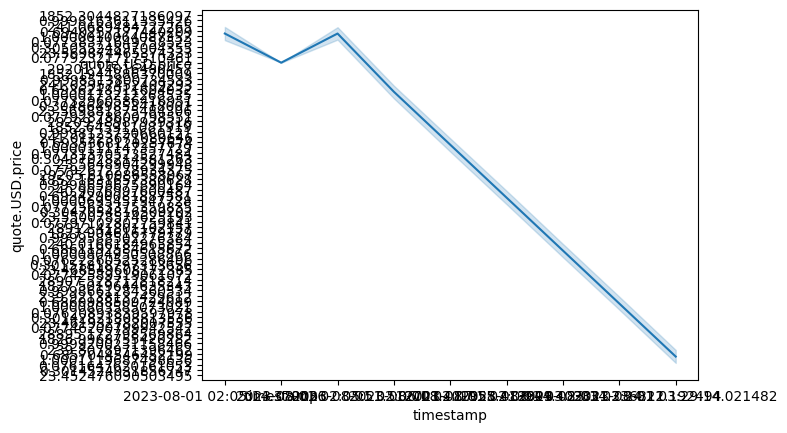

In [108]:
sns.lineplot(x='timestamp' , y ='quote.USD.price', data = df9)

In [106]:
df9 = pd.read_csv(r'/storage/emulated/0/Documents/Pydroid3/csv files/CoinMarketUpdate.csv')
df9

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0.00000,1,Bitcoin,BTC,bitcoin,10379,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,19444568.0,19444568.0,False,NaN,1,NaN,NaN,NaN,2023-08-01T02:03:00.000Z,29193.352468381505,11267017370.357096,18.1679,-0.31658206,-0.92019774,0.37851728,-4.49309757,8.82804387,2.3039648,567652127219.412,48.2927,613060401836.01,NaN,2023-08-01T02:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 02:05:14.370036
1,1.00000,1027,Ethereum,ETH,ethereum,7200,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,121082840.86259945,121082840.86259945,True,NaN,2,NaN,NaN,NaN,2023-08-01T02:03:00.000Z,1852.3044827186097,4297317197.503785,-0.3277,-0.53184141,-1.12218837,0.18033769,-3.5064288,-0.89244455,-0.60157411,224282288910.09702,19.0819,224282288910.1,NaN,2023-08-01T02:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 02:05:14.370036
2,2.00000,825,Tether USDt,USDT,tether,58246,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83819250310.67526,86706257841.30522,True,NaN,3,NaN,NaN,NaN,2023-08-01T02:03:00.000Z,0.9998163611335426,18070771309.961563,8.4066,-0.01047867,-0.01243247,-0.00691686,-0.03204713,-0.03580179,-0.05897648,83803857838.5609,7.13,86690335202.4,NaN,2023-08-01T02:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-01 02:05:14.370036
3,3.00000,1839,BNB,BNB,bnb,1551,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153855242.09257323,153855242.09257323,False,NaN,4,NaN,NaN,NaN,2023-08-01T02:03:00.000Z,241.0689484727265,438510315.5361566,-0.6609,-0.35018284,-1.05306663,0.86635446,-1.99997587,-21.04960364,-25.6748163,37089721428.2734,3.1554,37089721428.27,NaN,2023-08-01T02:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 02:05:14.370036
4,4.00000,52,XRP,XRP,xrp,1017,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.0,52693851493.0,99988556423.0,False,NaN,5,NaN,NaN,NaN,2023-08-01T02:03:00.000Z,0.6940257177440209,1548527806.5179596,13.8568,-0.23762283,-1.96513445,-0.53523872,46.7588343,35.51334321,50.03625169,36570888103.126175,3.1114,69402571774.4,NaN,2023-08-01T02:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 02:05:14.370036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,5.00000,3408,USD Coin,USDC,usd-coin,13502,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,26486567981.761486,26486567981.761486,False,NaN,6,NaN,NaN,NaN,2023-08-01T03:26:00.000Z,1.0001119687498636,3080838949.564385,35.5939,0.00475685,0.02120437,-0.00769633,0.00874421,0.02085616,0.0225241,26489533649.66658,2.2787,26489533649.67,NaN,2023-08-01T03:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-01 03:29:14.021482
163,6.00000,74,Dogecoin,DOGE,dogecoin,760,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,140406146383.70523,140406146383.70523,True,NaN,7,NaN,NaN,NaN,2023-08-01T03:26:00.000Z,0.0761647620161053,392600051.2917008,-7.1665,-0.00113698,-3.30068696,-1.05560007,13.17595072,5.88847486,-2.70449698,10694000724.913351,0.9199,10694000724.91,NaN,2023-08-01T03:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 03:29:14.021482
164,7.00000,2